## 펭귄 데이터 실습

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("penguins.csv")
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [14]:
df.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [15]:
df = df.drop('Comments', axis=1)  # 결측치가 많은 Comment 열은 아예 삭제
df = df.dropna()                  # 나머지 열에 대해서는 결측치가 있는 행을 삭제
df.isnull().sum()

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [16]:
df.studyName.value_counts()

PAL0910    117
PAL0809    113
PAL0708     95
Name: studyName, dtype: int64

In [17]:
df['Sample Number'].value_counts()

2      3
54     3
39     3
41     3
43     3
      ..
139    1
140    1
141    1
142    1
133    1
Name: Sample Number, Length: 152, dtype: int64

In [18]:
df.Region.value_counts()

Anvers    325
Name: Region, dtype: int64

In [19]:
df.Island.value_counts()

Biscoe       163
Dream        119
Torgersen     43
Name: Island, dtype: int64

In [20]:
df['Stage'].value_counts()

Adult, 1 Egg Stage    325
Name: Stage, dtype: int64

In [21]:
df['Individual ID'].value_counts()

N69A1    3
N22A2    3
N23A2    3
N24A2    3
N28A1    3
        ..
N68A1    1
N26A1    1
N84A2    1
N84A1    1
N43A2    1
Name: Individual ID, Length: 188, dtype: int64

In [22]:
df['Clutch Completion'].value_counts()

Yes    291
No      34
Name: Clutch Completion, dtype: int64

In [23]:
df.Sex.value_counts()

FEMALE    163
MALE      161
.           1
Name: Sex, dtype: int64

In [24]:
df = df[df.Sex!='.'] # 이상치 제거

In [25]:
df['Delta 15 N (o/oo)'].value_counts()

8.94956    1
9.46180    1
8.07137    1
7.79958    1
7.82080    1
          ..
9.32277    1
8.96436    1
9.49645    1
9.18021    1
8.36390    1
Name: Delta 15 N (o/oo), Length: 324, dtype: int64

In [26]:
df['Delta 13 C (o/oo)'].value_counts()

-24.69454    1
-24.70615    1
-25.52473    1
-25.62618    1
-25.48025    1
            ..
-26.09989    1
-23.90309    1
-26.36678    1
-25.77264    1
-26.15531    1
Name: Delta 13 C (o/oo), Length: 324, dtype: int64

In [27]:
df.duplicated().sum() # 중복 데이터는 없음

0

In [28]:
# 불필요해보이는 Columns
columns = ['Region', 'Stage', 'Individual ID', 'Date Egg', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']

df = df.drop(columns, axis=1)
df.columns

Index(['studyName', 'Sample Number', 'Species', 'Island', 'Clutch Completion',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            324 non-null    object 
 1   Sample Number        324 non-null    int64  
 2   Species              324 non-null    object 
 3   Island               324 non-null    object 
 4   Clutch Completion    324 non-null    object 
 5   Culmen Length (mm)   324 non-null    float64
 6   Culmen Depth (mm)    324 non-null    float64
 7   Flipper Length (mm)  324 non-null    float64
 8   Body Mass (g)        324 non-null    float64
 9   Sex                  324 non-null    object 
dtypes: float64(4), int64(1), object(5)
memory usage: 27.8+ KB


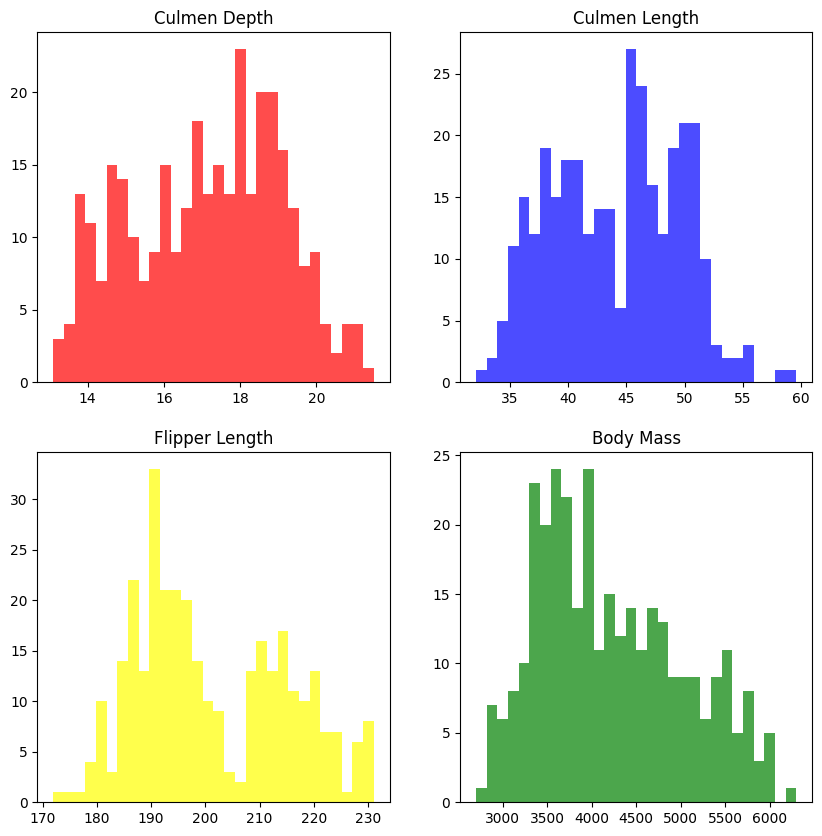

In [30]:
# 수치형 데이터의 데이터 분포 시각
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.hist(df['Culmen Depth (mm)'], bins=30, color= 'red', alpha = 0.7)
plt.title('Culmen Depth')

plt.subplot(2, 2, 2)
plt.hist(df['Culmen Length (mm)'], bins=30, color= 'blue', alpha = 0.7)
plt.title('Culmen Length')

plt.subplot(2, 2, 3)
plt.hist(df['Flipper Length (mm)'], bins=30, color= 'yellow', alpha = 0.7)
plt.title('Flipper Length')

plt.subplot(2, 2, 4)
plt.hist(df['Body Mass (g)'], bins=30, color= 'green', alpha = 0.7)
plt.title('Body Mass')

plt.show()

In [31]:
columns_to_scale = ['Culmen Depth (mm)', 'Culmen Length (mm)', 'Flipper Length (mm)', 'Body Mass (g)']
df[columns_to_scale].head()

,Culmen Depth (mm),Culmen Length (mm),Flipper Length (mm),Body Mass (g)
1,17.4,39.5,186.0,3800.0
2,18.0,40.3,195.0,3250.0
4,19.3,36.7,193.0,3450.0
5,20.6,39.3,190.0,3650.0
6,17.8,38.9,181.0,3625.0


In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df[columns_to_scale].head()

,Culmen Depth (mm),Culmen Length (mm),Flipper Length (mm),Body Mass (g)
1,0.138739,-0.832100,-1.091764,-0.512317
2,0.444184,-0.685906,-0.446007,-1.192986
4,1.105981,-1.343780,-0.589508,-0.945470
5,1.767779,-0.868649,-0.804761,-0.697954
6,0.342369,-0.941746,-1.450518,-0.728893


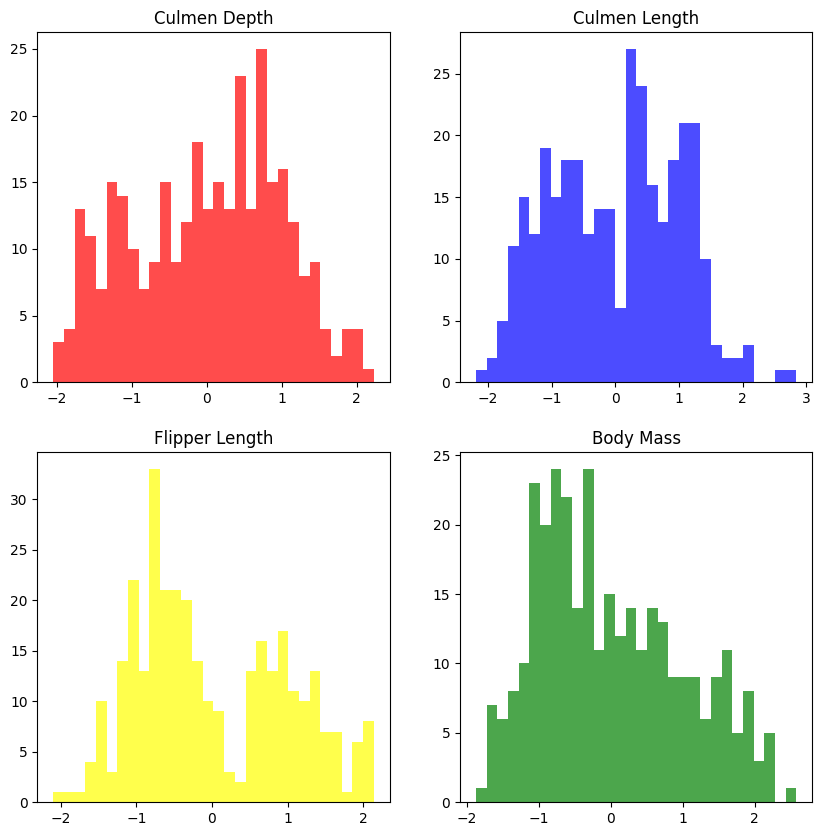

In [33]:
# 스케일링 이후의 분포 확인
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
plt.hist(df['Culmen Depth (mm)'], bins=30, color= 'red', alpha = 0.7)
plt.title('Culmen Depth')

plt.subplot(2, 2, 2)
plt.hist(df['Culmen Length (mm)'], bins=30, color= 'blue', alpha = 0.7)
plt.title('Culmen Length')

plt.subplot(2, 2, 3)
plt.hist(df['Flipper Length (mm)'], bins=30, color= 'yellow', alpha = 0.7)
plt.title('Flipper Length')

plt.subplot(2, 2, 4)
plt.hist(df['Body Mass (g)'], bins=30, color= 'green', alpha = 0.7)
plt.title('Body Mass')

plt.show()

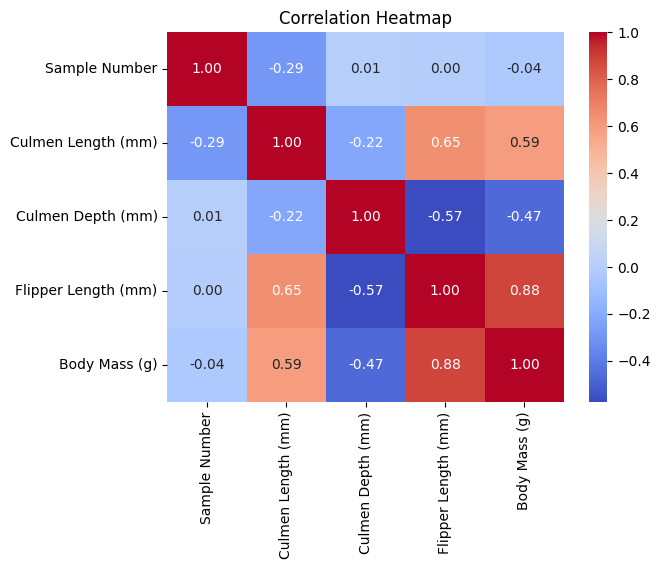

In [34]:
# 범주형 데이터를 제외한 수치형 데이터 사이의 상관계수 히트맵
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [35]:
# 범주형 데이터를 One-Hot Encoding
onehot = ['studyName', 'Species', 'Island', 'Clutch Completion', 'Sex']

df_result = pd.concat([df.drop(onehot, axis=1), pd.get_dummies(df[onehot], drop_first=True)], axis=1)
df_result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 1 to 343
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Sample Number                                      324 non-null    int64  
 1   Culmen Length (mm)                                 324 non-null    float64
 2   Culmen Depth (mm)                                  324 non-null    float64
 3   Flipper Length (mm)                                324 non-null    float64
 4   Body Mass (g)                                      324 non-null    float64
 5   studyName_PAL0809                                  324 non-null    uint8  
 6   studyName_PAL0910                                  324 non-null    uint8  
 7   Species_Chinstrap penguin (Pygoscelis antarctica)  324 non-null    uint8  
 8   Species_Gentoo penguin (Pygoscelis papua)          324 non-null    uint8  
 9   Island_Dre

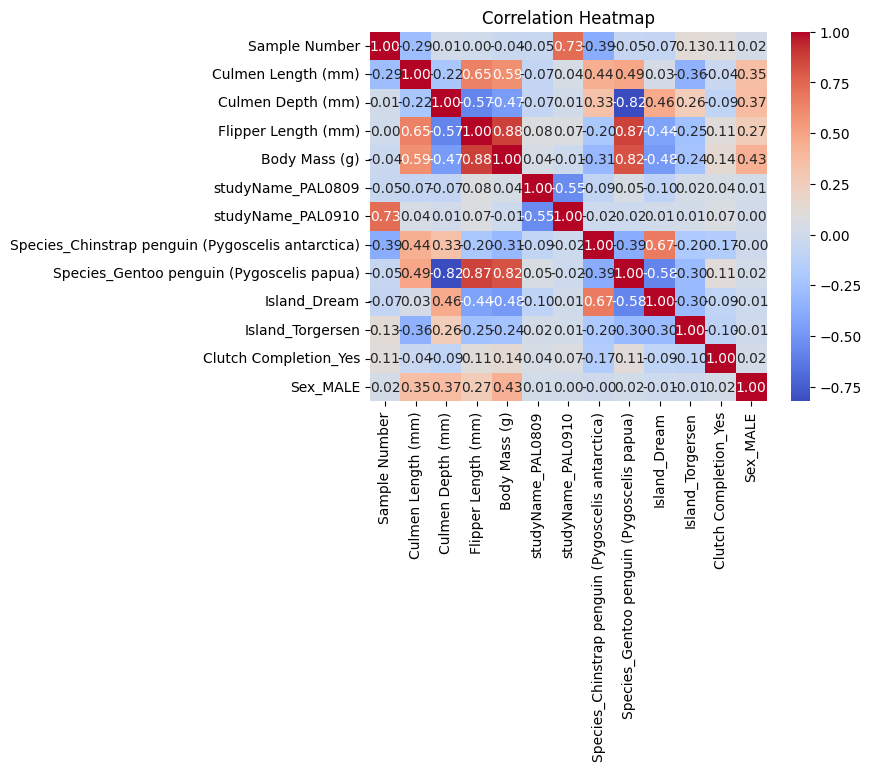

In [36]:
# One-Hot Encoding 이후의 데이터에 대한 상관계수 히트맵
correlation_matrix = df_result.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_result.drop("Culmen Length (mm)", axis=1), df_result["Culmen Length (mm)"], test_size=0.2, random_state=42)
y_train

86    -1.416877
194    1.251168
26    -0.631083
33    -0.576260
159    1.324265
         ...   
201    1.050151
84    -1.234135
119   -0.539712
287    0.995328
115   -0.247323
Name: Culmen Length (mm), Length: 259, dtype: float64

In [38]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr_rbf = SVR()
svr_rbf.fit(X_train, y_train)

y_pred = svr_rbf.predict(X_test)

# 예측값과 실제값 간의 평균 제곱 오차(MSE) 계산
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

# 평균 제곱 오차(MSE)를 루트로 취한 RMSE 계산
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

MSE: 0.9103234189426584
RMSE: 0.9541087039445025


In [39]:
# Restore from scaling
y_pred = y_pred * scaler.scale_[0] + scaler.mean_[0]
y_test = y_test * scaler.scale_[0] + scaler.mean_[0]

# Calculating Mean Squared Error
print('L2 upscale', mean_squared_error(y_test, y_pred))
print('L1 upscale', mean_absolute_error(y_test, y_pred))

L2 upscale 3.51262767783345
L1 upscale 1.5713004833258202
